In [2]:
import numpy as np    
import pandas as pd

In [3]:
train_data = pd.read_csv('wn22_PA_training_labels.txt')
#print(train_data)

In [4]:
train_labels = train_data.loc[:,'Label']
#print(train_labels)
# Pandas series

In [5]:
train_tweet_data = pd.read_csv('train_tweets_cleaned.txt')
#print(train_tweet_data)

In [6]:
train_tweets = train_tweet_data.loc[:,'Tweet']
#print(train_tweets)

In [7]:
test_tweet_data = pd.read_csv('test_tweets_cleaned.txt')
#print(test_tweet_data)

In [8]:
test_tweets = test_tweet_data.loc[:,'Tweet']
#print(test_tweets)

In [11]:
test_tweets

0              @_jillbethename HE WENT BOWLING WITH THEM
1      Time is running out on your dreams, or so it f...
2      Ran 2km today with my girl _____՟ @angelicaleigh_
3      _ Saturday Morning Fitness _\n\n9:30am, 3, Hol...
4       @kyllis327 how's the ol' diaper bag working out?
                             ...                        
795    #LyricsILIKETOSCREAM .... COME OUT OF THE CAVE...
796    #MESDetroit \n\n-$10,000 Prize Pool\n-PlayStat...
797    I have the #2 pick in my fantasy basketball le...
798    @karlravechespn seem more mental mistakes and ...
799                Lil kids football camp In the morning
Name: Tweet, Length: 800, dtype: object

In [12]:
# This function below will clean and preprocess a series of tweets

def preprocess_tweets(tweet_series):
    import re
    import emoji
    import nltk
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    #nltk.download('stopwords')
    from nltk.stem.porter import PorterStemmer
    
    # Initialize cleaned tweets list
    tweets_cleaned = []
    
    for i in range(len(tweet_series)):
        tweet = tweet_series[i]
        
        # Make all lowercase for easy processing
        tweet = tweet.lower()
        
        # Remove @ mentions
        tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
        # Remove # but keep word
        tweet = tweet.replace("#", "") #.replace("_", " ")
        
        # Remove links
        tweet = re.sub(r"http\S+", "", tweet)
        tweet = re.sub(r"www.\S+", "", tweet)
        
        # Remove punctuation marks
        tweet = re.sub('[()!?]', ' ', tweet)
        tweet = re.sub('\[.*?\]',' ', tweet)
        
        # Remove emojis and all characters expect for alphabet and numbers
        tweet = word_tokenize(tweet)
        tweet = ' '.join(w for w in tweet if w not in emoji.UNICODE_EMOJI)
        tweet = re.sub("[^a-z0-9]"," ", tweet)
        
        # Tokenize to stem and remove stopwords
        tweet = word_tokenize(tweet)           
        from nltk.stem.snowball import SnowballStemmer
        snow_stemmer = SnowballStemmer(language='english')
        def snow_stem(tweet):
            stem = [snow_stemmer.stem(word) for word in tweet]
            return stem
        tweet = snow_stem(tweet)
        tweet = ' '.join([word for word in tweet if not word in stopwords.words('english')])
        
        #print(tweet)     
        tweets_cleaned.append(tweet)
        
        # Stemming
        #stemmer = PorterStemmer()
        #def stemming(tweet):
        #    stem = [stemmer.stem(word) for word in tweet]
        #    return stem
        #tweet = stemming(tweet)
        
        #nltk.download('wordnet')
        #from nltk.stem import WordNetLemmatizer
        #lemmatizer = WordNetLemmatizer()
        #lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in tweet])
        
    return tweets_cleaned

In [12]:
# Preprocess the train and test tweets

train_tweets_clean = preprocess_tweets(train_tweets)
test_tweets_clean = preprocess_tweets(test_tweets)

In [646]:
from sklearn.model_selection import train_test_split

X = train_tweets_clean
Y = train_labels

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words='english')
X = tfidf_vec.fit_transform(X)

X_training, X_validation, Y_training, Y_validation = train_test_split(X,Y,random_state=500)

f1 score MACRO: 
0.6698065299648414
f1 score MICRO: 
0.76125


Confusion matrix, without normalization


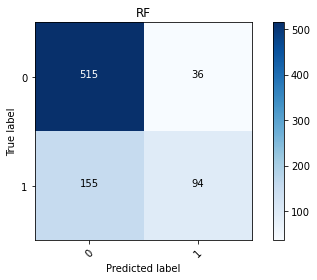

In [647]:
# Random Forest Classifier

rf_model = RandomForestClassifier(random_state=500)
rf_model.fit(X_training, Y_training)
rf_pred = rf_model.predict(X_validation)

print('f1 score MACRO: ')
print(f1_score(Y_validation, rf_pred, average='macro'))
print('f1 score MICRO: ')
print(f1_score(Y_validation, rf_pred, average='micro'))
print('\n')

classes=list(set(Y_validation))
cm = confusion_matrix(Y_validation, rf_pred, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='RF')


f1 score MACRO: 
0.604441748932553
f1 score MICRO: 
0.74625


Confusion matrix, without normalization


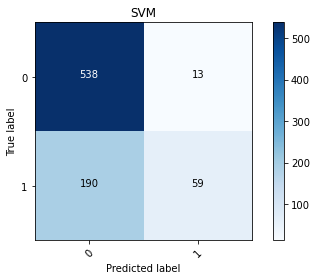

In [654]:
# SVM

svm_model = svm.SVC(random_state=2000)
svm_model.fit(X_training, Y_training)
svm_pred = svm_model.predict(X_validation)

print('f1 score MACRO: ')
print(f1_score(Y_validation, svm_pred, average='macro'))
print('f1 score MICRO: ')
print(f1_score(Y_validation, svm_pred, average='micro'))
print('\n')

classes=list(set(Y_validation))
cm = confusion_matrix(Y_validation, svm_pred, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='SVM')


f1 score MACRO: 
0.6958697334421718
f1 score MICRO: 
0.75375


Confusion matrix, without normalization


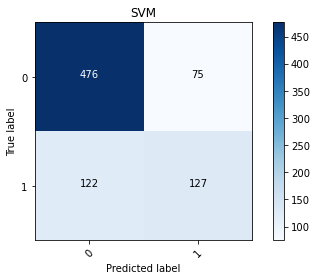

In [655]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(random_state=500)
svc_model.fit(X_training,Y_training)

Y_pred = svc_model.predict(X_validation)

print('f1 score MACRO: ')
print(f1_score(Y_validation, Y_pred, average='macro'))
print('f1 score MICRO: ')
print(f1_score(Y_validation, Y_pred, average='micro'))
print('\n')

classes=list(set(Y_validation))
cm = confusion_matrix(Y_validation, Y_pred, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='SVM')

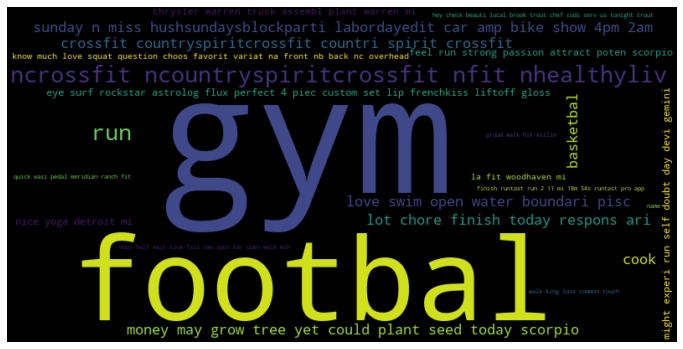

In [443]:
from nltk import FreqDist
from wordcloud import WordCloud
#Frequency of words
fdist = FreqDist(train_tweets_clean)
#WordCloud
wc = WordCloud(width=800, height=400, max_words=25).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [239]:
# Bag of Words Model

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Set up CountVectorizer to tokenize by unigrams
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')

# Transform tweet data from the list of cleaned tweets
bow_train = vectorizer.fit_transform(train_tweets_clean)
bow_test = vectorizer.transform(test_tweets_clean)

# Create BOW data frame
#bow_df = pd.DataFrame(count_data.toarray(), columns=vectorizer.get_feature_names())


In [651]:
# TF IDF
# With smoothing
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))

tfidf_train = tfidf_vectorizer.fit_transform(train_tweets_clean)
#tfidf_df = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names())

tfidf_test = tfidf_vectorizer.transform(test_tweets_clean)

In [653]:
model_Lin = LinearSVC(random_state=500)
model_Lin.fit(tfidf_train, train_labels)
pred_Lin = model_Lin.predict(tfidf_test)

pred_df.pop('Label')

pred_df['Label'] = pred_Lin.tolist()

pred_df.to_csv('LinSVC.txt', index=False)

In [463]:
model_nb = MultinomialNB()
model_nb.fit(tfidf_train, train_labels)
pred_nb = model_nb.predict(tfidf_test)

pred_df.pop('Label')

pred_df['Label'] = pred_nb.tolist()

pred_df.to_csv('naive_bayes.txt', index=False)

In [587]:
model_rf = RandomForestClassifier(random_state=500)
model_rf.fit(tfidf_train, train_labels)
pred_rf = model_rf.predict(tfidf_test)

In [589]:
#pred_df.pop('Label')

In [590]:
pred_df['Label'] = pred_rf.tolist()

In [591]:
pred_df.to_csv('pred_rf_tfidf_4.txt', index=False)

In [351]:
model_svm = svm.SVC()
model_svm.fit(tfidf_train, train_labels)
pred_svm = model_svm.predict(tfidf_test)

In [355]:
pred_df['Label'] = pred_svm.tolist()

In [366]:
pred_df.to_csv('pred_svm_tfidf.txt', index=False)

In [595]:
# Initialize Model

from sklearn import svm

model_svm = svm.SVC(random_state=500)

In [596]:
# Train the model
model_svm.fit(tfidf_train, train_labels)

SVC(random_state=500)

In [597]:
# Predict using model
pred_svm = model_svm.predict(tfidf_test)

In [600]:
#test_pred_labels.pop('Label')

In [601]:
test_pred_labels['Label'] = pred_svm.tolist()

In [602]:
test_pred_labels.to_csv('svm_rs500.txt', index=False)

In [ ]:
# Predict using Random Forest and Bag of Words

In [134]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(bow_train, train_labels)
pred_rf = model_rf.predict(bow_test)

In [136]:
pred_df = test_pred_labels

In [143]:
pred_df['Label'] = pred_rf.tolist()

In [145]:
#pred_df.to_csv('pred_rf_bow.txt', index=False)

In [246]:
# Random Forest and TF IDF

model_rf.fit(tfidf_train, train_labels)
pred_rf_tfidf_4 = model_rf.predict(tfidf_test)

In [247]:
#pred_df.pop('Label')

In [248]:
pred_df['Label'] = pred_rf_tfidf_2.tolist()

In [249]:
pred_df.to_csv('pred_rf_tfidf_2.txt', index=False)

In [110]:
# Splitting into training and validation sets to assess performance

In [133]:
len(train_labels)

3200

In [482]:
# Oversample 1 group

train_labels_oversample = []
train_tweets_oversample = []

for i in range(len(train_labels)):
    if train_labels[i] == 0:
        train_labels_oversample.append(train_labels[i])
        train_tweets_oversample.append(train_tweets_clean[i])
        
    if train_labels[i] == 1:
        train_labels_oversample.append(train_labels[i])
        train_tweets_oversample.append(train_tweets_clean[i])
        train_labels_oversample.append(train_labels[i])  
        train_tweets_oversample.append(train_tweets_clean[i])
        

In [556]:
# Undersample

train_labels_undersample = []
train_tweets_undersample = []

for i in range(int(.4*len(train_labels))):
    if train_labels[i] == 1:
        train_labels_undersample.append(train_labels[i])
        train_tweets_undersample.append(train_tweets_clean[i])

for i in range(int(0.4*len(train_labels)),len(train_labels)):
    train_labels_undersample.append(train_labels[i])
    train_tweets_undersample.append(train_tweets_clean[i])
        


In [557]:
train_labels_undersample.count(1)

1021

In [558]:
train_labels_undersample.count(0)

1306

In [559]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()

tfidf_train = tfidf_vec.fit_transform(train_tweets_undersample)
tfidf_test = tfidf_vec.transform(test_tweets_clean)

In [560]:
model_nb = MultinomialNB()
model_nb.fit(tfidf_train, train_labels_undersample)
pred_nb = model_nb.predict(tfidf_test)

pred_df.pop('Label')

pred_df['Label'] = pred_nb.tolist()

pred_df.to_csv('NB_undersample.txt', index=False)

In [555]:
model_rf = RandomForestClassifier()
model_rf.fit(tfidf_train, train_labels_undersample)
pred_rf = model_rf.predict(tfidf_test)

pred_df.pop('Label')

pred_df['Label'] = pred_nb.tolist()

pred_df.to_csv('rf_undersample.txt', index=False)

In [547]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()

tfidf_train = tfidf_vec.fit_transform(train_tweets_oversample)
tfidf_test = tfidf_vec.transform(test_tweets_clean)

In [549]:
model_nb = MultinomialNB()
model_nb.fit(tfidf_train, train_labels_oversample)
pred_nb = model_nb.predict(tfidf_test)

#pred_df.pop('Label')

pred_df['Label'] = pred_nb.tolist()

pred_df.to_csv('NB_oversample.txt', index=False)

In [474]:
N = len(train_labels_oversample)
_80 = int(N*.80)

labels_training = train_labels_oversample[:_80]
tweets_training = train_tweets_oversample[:_80]

labels_validation = train_labels_oversample[_80:]
tweets_validation = train_tweets_oversample[_80:]


In [475]:
# Create features

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()

x_training = tfidf_vec.fit_transform(tweets_training)
x_validation = tfidf_vec.transform(tweets_validation) 

Confusion matrix, without normalization


0.6220675105485232

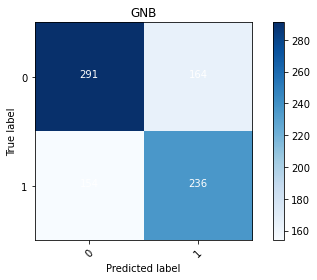

In [476]:
# Let's try Naive Bayes model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb_model = gnb.fit(x_training.toarray(), labels_training)
gnb_pred = gnb_model.predict(x_validation.toarray())

classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, gnb_pred, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='GNB')

f1_score(labels_validation, gnb_pred, average='macro')

In [221]:
# Initialize model

from sklearn import svm
model_svm = svm.SVC()

In [222]:
# Train model: SVM

model_svm.fit(x_training,labels_training)

SVC()

In [223]:
# Make predictions with model

pred_svm = model_svm.predict(x_validation)

In [194]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


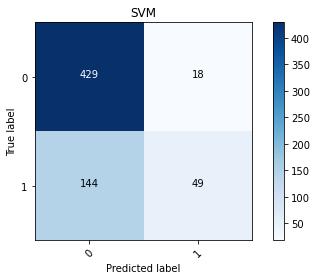

In [224]:
classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, pred_svm, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='SVM')

In [486]:
# Training Random Forest model

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(x_training, labels_training)

pred_rf = model_rf.predict(x_validation)

Confusion matrix, without normalization


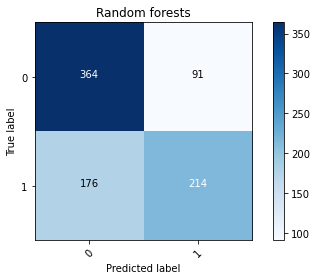

In [487]:
classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, pred_rf, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='Random forests')

In [227]:
from sklearn.metrics import f1_score

In [228]:
#0.6380458543032891

f1_score(labels_validation, pred_rf, average='macro')

0.6422224928872357

In [229]:
#0.6112719146957812

f1_score(labels_validation, pred_svm, average='macro')

0.609049773755656

In [230]:
# Let's try Bag of Words training

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')

bow_training = vectorizer.fit_transform(tweets_training)
bow_validation = vectorizer.transform(tweets_validation)


In [231]:
model_svm = svm.SVC()
model_svm.fit(bow_training,labels_training)

SVC()

In [232]:
pred_svm = model_svm.predict(bow_validation)

Confusion matrix, without normalization


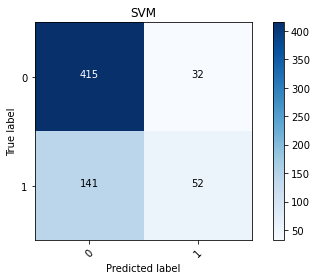

In [233]:
classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, pred_svm, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='SVM')

In [234]:
f1_score(labels_validation, pred_svm, average='macro')

0.6014843555974675

Confusion matrix, without normalization


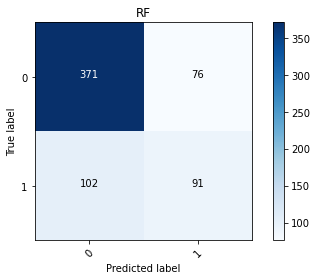

In [236]:
classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, pred_rf_bow, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='RF')

In [237]:
f1_score(labels_validation, pred_rf_bow, average='macro')

0.6560386473429952

In [294]:
# Splitting validation again

In [564]:
N = len(train_labels)
_80 = int(N*.80)

labels_training = train_labels[:_80]
tweets_training = train_tweets_clean[:_80]

labels_validation = train_labels[_80:]
tweets_validation = train_tweets_clean[_80:]

In [565]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(ngram_range=(1,1))

x_training = tfidf_vec.fit_transform(tweets_training)
x_validation = tfidf_vec.transform(tweets_validation) 

f1 score MACRO: 
0.6529459241323647
f1 score MICRO: 
0.73125


Confusion matrix, without normalization


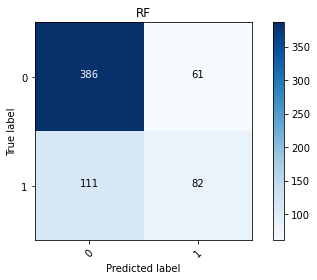

In [572]:
# Random Forest Classifier

rf_model = RandomForestClassifier(random_state=500)
rf_model.fit(x_training, labels_training)
rf_x_pred = rf_model.predict(x_validation)

print('f1 score MACRO: ')
print(f1_score(labels_validation, rf_x_pred, average='macro'))
print('f1 score MICRO: ')
print(f1_score(labels_validation, rf_x_pred, average='micro'))
print('\n')

classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, rf_x_pred, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='RF')


f1 score MACRO: 
0.6244957829116244
f1 score MICRO: 
0.75


Confusion matrix, without normalization


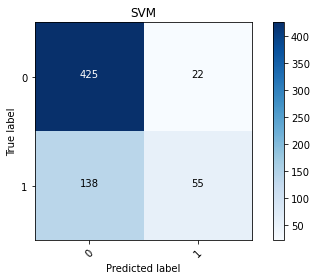

In [603]:
# SVM

svm_model = svm.SVC(random_state=500)
svm_model.fit(x_training, labels_training)
svm_x_pred = svm_model.predict(x_validation)

print('f1 score MACRO: ')
print(f1_score(labels_validation, svm_x_pred, average='macro'))
print('f1 score MICRO: ')
print(f1_score(labels_validation, svm_x_pred, average='micro'))
print('\n')

classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, svm_x_pred, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='SVM')


f1 score MACRO: 
0.6852056240702529
f1 score MICRO: 
0.74375


Confusion matrix, without normalization


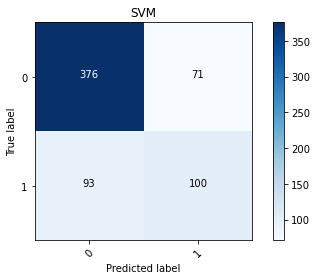

In [604]:
# SVM
from sklearn.svm import LinearSVC

svmLin_model = svm.LinearSVC(random_state=500)
svmLin_model.fit(x_training, labels_training)
svmLin_pred = svmLin_model.predict(x_validation)

print('f1 score MACRO: ')
print(f1_score(labels_validation, svmLin_pred, average='macro'))
print('f1 score MICRO: ')
print(f1_score(labels_validation, svmLin_pred, average='micro'))
print('\n')

classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, svmLin_pred, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='SVM')


f1 score MACRO: 
0.5279588336192109
f1 score MICRO: 
0.73125


Confusion matrix, without normalization


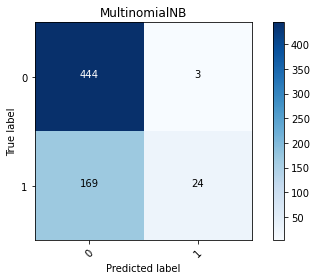

In [576]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(x_training, labels_training)
pred_nb = model_nb.predict(x_validation)

print('f1 score MACRO: ')
print(f1_score(labels_validation, pred_nb, average='macro'))
print('f1 score MICRO: ')
print(f1_score(labels_validation, pred_nb, average='micro'))
print('\n')

classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, pred_nb, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='MultinomialNB')

f1 score MACRO: 
0.5819517681599743
f1 score MICRO: 
0.5924528301886792


Confusion matrix, without normalization


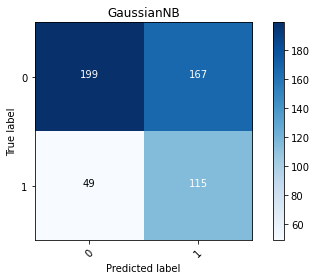

In [522]:
# Same outcome for Bernoulli NB

model_nbg = GaussianNB()
model_nbg.fit(x_training.toarray(), labels_training)
pred_nbg = model_nbg.predict(x_validation.toarray())

print('f1 score MACRO: ')
print(f1_score(labels_validation, pred_nbg, average='macro'))
print('f1 score MICRO: ')
print(f1_score(labels_validation, pred_nbg, average='micro'))
print('\n')

classes=list(set(labels_validation))
cm = confusion_matrix(labels_validation, pred_nbg, labels=classes)
plot_confusion_matrix(cm, classes=classes, title='GaussianNB')